### Implementing simple Chatbot Using LangGraph

In [1]:
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END

## Reducers
from typing import Annotated
from langgraph.graph.message import add_messages

In [2]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

In [3]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")


In [4]:
from langchain_openai import ChatOpenAI
llm=ChatOpenAI(model="gpt-4o")
llm.invoke("Hello")

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 8, 'total_tokens': 18, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_f9f4fb6dbf', 'finish_reason': 'stop', 'logprobs': None}, id='run-902c91c5-ea3a-4466-a6c3-fea75daf2ca0-0', usage_metadata={'input_tokens': 8, 'output_tokens': 10, 'total_tokens': 18, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [5]:
!pip install langchain-groq

  Using cached langchain_core-0.3.74-py3-none-any.whl.metadata (5.8 kB)
Using cached langchain_core-0.3.74-py3-none-any.whl (443 kB)
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.69
    Uninstalling langchain-core-0.3.69:
      Successfully uninstalled langchain-core-0.3.69
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [langchain-groq]m [langchain-core]

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [8]:
from langchain_groq import ChatGroq

llm_groq=ChatGroq(model="llama3-70b-8192")
llm_groq.invoke("Hey I am Niranjana and i like to play cricket")

AIMessage(content="Hey Niranjana! Nice to meet you! Cricket is an amazing sport, and I'm sure you must be thrilled to play it! Do you have a favorite team or player? Have you ever played in any local tournaments or leagues?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 49, 'prompt_tokens': 22, 'total_tokens': 71, 'completion_time': 0.125704542, 'prompt_time': 0.011042414, 'queue_time': 0.266702885, 'total_time': 0.136746956}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_bf16903a67', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--721f08c7-8baa-4c36-be96-b525b8dd8255-0', usage_metadata={'input_tokens': 22, 'output_tokens': 49, 'total_tokens': 71})

### We Will start With Creating Nodes

In [9]:
def superbot(state:State):
    return {"messages":[llm_groq.invoke(state['messages'])]}

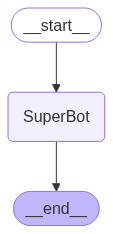

In [10]:
graph=StateGraph(State)

## node
graph.add_node("SuperBot",superbot)
## Edges

graph.add_edge(START,"SuperBot")
graph.add_edge("SuperBot",END)


graph_builder=graph.compile()


## Display
from IPython.display import Image, display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [12]:
## Invocation

graph_builder.invoke({'messages':"Hi,My name is Niranjana And I like cricket"})

{'messages': [HumanMessage(content='Hi,My name is Niranjana And I like cricket', additional_kwargs={}, response_metadata={}, id='81c7bda1-6dce-4fc7-995a-cb1973eadcaf'),
  AIMessage(content="Nice to meet you, Niranjana! Cricket is an amazing sport, isn't it? Who's your favorite team or player? Do you have a favorite format of the game, like Test matches, ODIs, or T20s?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 50, 'prompt_tokens': 22, 'total_tokens': 72, 'completion_time': 0.107175944, 'prompt_time': 0.011199237, 'queue_time': 0.268837374, 'total_time': 0.118375181}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_de9fa14705', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--ded140dd-200c-457f-9491-6e3a8356dfed-0', usage_metadata={'input_tokens': 22, 'output_tokens': 50, 'total_tokens': 72})]}

#### Streaming The responses

In [13]:
for event in graph_builder.stream({"messages":"Hello My name is Niranjana"}):
    print(event)

{'SuperBot': {'messages': [AIMessage(content="Namaste Niranjana! It's nice to meet you. I'm your AI assistant, here to help you with any questions or topics you'd like to discuss. How's your day going so far?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 43, 'prompt_tokens': 17, 'total_tokens': 60, 'completion_time': 0.087782461, 'prompt_time': 0.010647952, 'queue_time': 0.269460358, 'total_time': 0.098430413}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_de9fa14705', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--7c792a6f-f24b-400d-8cd7-76c056ebe00f-0', usage_metadata={'input_tokens': 17, 'output_tokens': 43, 'total_tokens': 60})]}}
